### The following code will generate the plots associated with comparing the performance of the OWL against human scorers

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm, linregress
from statistics import mean, stdev
from math import sqrt

In [3]:
#combined.to_csv('C:/Users/Emily/Desktop/UL_analysis/S1_manual_counts/20220215_combined.csv')
combined = pd.read_csv('C:/Users/Emily/Desktop/UL_analysis/S1_manual_counts/20220215_combined.csv', index_col=0)
counts = pd.read_csv('C:/Users/Emily/Desktop/UL_analysis/Manual vs OWL counts.csv', index_col=0)
hva = counts.iloc[:, 0:9].copy() 

#### Total Worms: (H1,H2) vs OWL

In [7]:
h1_counts = hva['Person1_Count']
h2_counts = hva['Person2_Count']
OWL_counts = hva['OWL_Count']

h1c_df = pd.DataFrame(list(zip(OWL_counts, h1_counts)),
               columns =['OWL', 'Human']).dropna()

h2c_df = pd.DataFrame(list(zip(OWL_counts, h2_counts)),
               columns =['OWL', 'Human']).dropna()
longc = h1c_df.append(h2c_df)


slope, intercept, r_value, p_value, std_err = linregress(longc['Human'], longc['OWL'])
print(slope, intercept, r_value, p_value, std_err)
rsqrd = print(f"R-squared: {r_value**2:.6f}")

0.5194478243710937 39.713378430356016 0.9011659862826732 1.2417592965088699e-14 0.04164368226154043
R-squared: 0.812100


C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


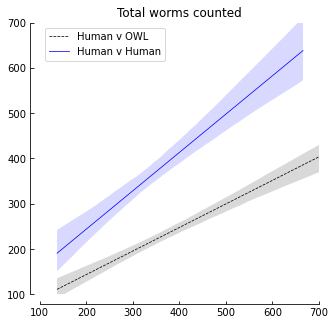

In [8]:
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.regplot(longc['Human'], longc['OWL'], scatter=False,
    fit_reg = True, color = 'black', label='Human v OWL', line_kws={'linewidth':.75, 'linestyle': '--'})
ax = sns.regplot(hva['Person1_Count'], hva['Person2_Count'], scatter=False,
    fit_reg = True, color = 'blue', label='Human v Human' ,line_kws={'linewidth':.75})

ax.set_xlabel('')
ax.set_ylabel('')
ax.set(xlim=(100,700), ylim=(100, 700), title='Total worms counted')
ax.tick_params(axis="both",direction="in")
sns.despine(offset=10)
ax.legend()
plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/HvO_totalwrms.svg')

#### Total Worms: H1 vs H2

In [9]:
h1h2 = pd.DataFrame(list(zip(h1_counts, h2_counts)),
               columns =['H1', 'H2']).dropna()

slope, intercept, r_value, p_value, std_err = linregress(h1h2['H1'], h1h2['H2'])
print(slope, intercept, r_value, p_value, std_err)
rsqrd = print(f"R-squared: {r_value**2:.6f}")

0.8458484000557978 74.73390549191976 0.9097637723875345 6.696076439924178e-08 0.09360945644872014
R-squared: 0.827670


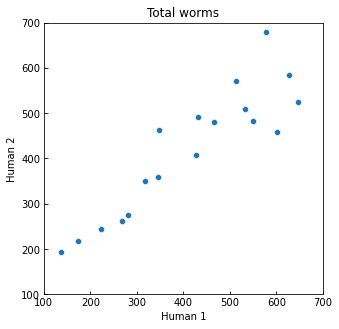

In [10]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.scatterplot(data=hva, x="Person1_Count", y="Person2_Count")

ax.set_xlabel('Human 1')
ax.set_ylabel('Human 2')
ax.set(xlim=(100,700), ylim=(100, 700), title='Total worms')
ax.tick_params(axis="both",direction="in")
plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/HvH_totalwrms.svg')

#### Mean position: H1 vs H2

In [11]:
g = combined.groupby(['FileName', 'Counter']).mean().reset_index()
h1 = g.loc[g['Counter']=='H1']['X']
h2 = g.loc[g['Counter']=='H2']['X']
OWL = g.loc[g['Counter']=='Auto']['X']

xs = pd.DataFrame(list(zip(OWL, h1, h2)),
               columns =['OWL', 'H1', 'H2'])

In [12]:
slope, intercept, r_value, p_value, std_err = linregress(xs['H1'], xs['H2'])
print(slope, intercept, r_value, p_value, std_err)
rsqrd = print(f"R-squared: {r_value**2:.6f}")

0.9964597099691599 -0.08452613285382693 0.9961257883029415 2.15276226628817e-19 0.02133569164122456
R-squared: 0.992267


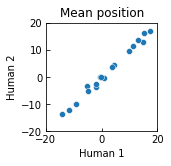

In [13]:
fig, ax = plt.subplots(figsize=(2,2))
ax = sns.scatterplot(data=xs, x='H1', y='H2')

ax.set_xlabel('Human 1')
ax.set_ylabel('Human 2')
ax.set(xlim=(-20,20), ylim=(-20, 20), title='Mean position')
ax.tick_params(axis="both",direction="in")
#plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/HvH_mnX.svg')

#### Mean position: (H1, H2) vs OWL

In [14]:
h1_df = pd.DataFrame(list(zip(OWL, h1)),
               columns =['OWL', 'Human'])

h2_df = pd.DataFrame(list(zip(OWL, h2)),
               columns =['OWL', 'Human'])
long = h1_df.append(h2_df)

slope, intercept, r_value, p_value, std_err = linregress(long['Human'], long['OWL'])
print(slope, intercept, r_value, p_value, std_err)
rsqrd = print(f"R-squared: {r_value**2:.6f}")

0.774261178490022 -0.12350559860479393 0.9782553619582498 3.429496328466577e-26 0.027359065808229457
R-squared: 0.956984


C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


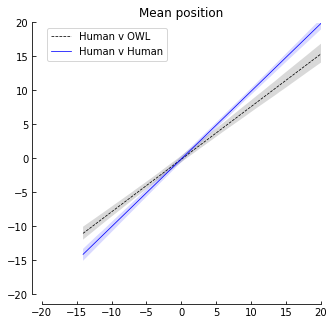

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.regplot(long['Human'], long['OWL'], scatter = False,
    fit_reg = True, color = 'black', label="Human v OWL",line_kws={'linewidth':.75, 'linestyle':'--'})
ax = sns.regplot(xs['H1'], xs['H2'], scatter = False,
    fit_reg = True, color = 'blue', label="Human v Human", line_kws={'linewidth':.75})
ax.set_xlabel('')
ax.set_ylabel('')
ax.set(xlim=(-20,20), ylim=(-20, 20), title='Mean position')
ax.tick_params(axis="both",direction="in")
ax.legend()
sns.despine(offset=10)
plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/HvO_mnX.svg')

#### Density curves comparing worm locations identified by H1, H2 and OWL

In [16]:
subs = ['loc_S1_005_1C', 'loc_S1_010_2D', 'loc_S1_004_2D', 'loc_S1_004_2B']
subs_df = combined.loc[combined['FileName'].isin(subs)]

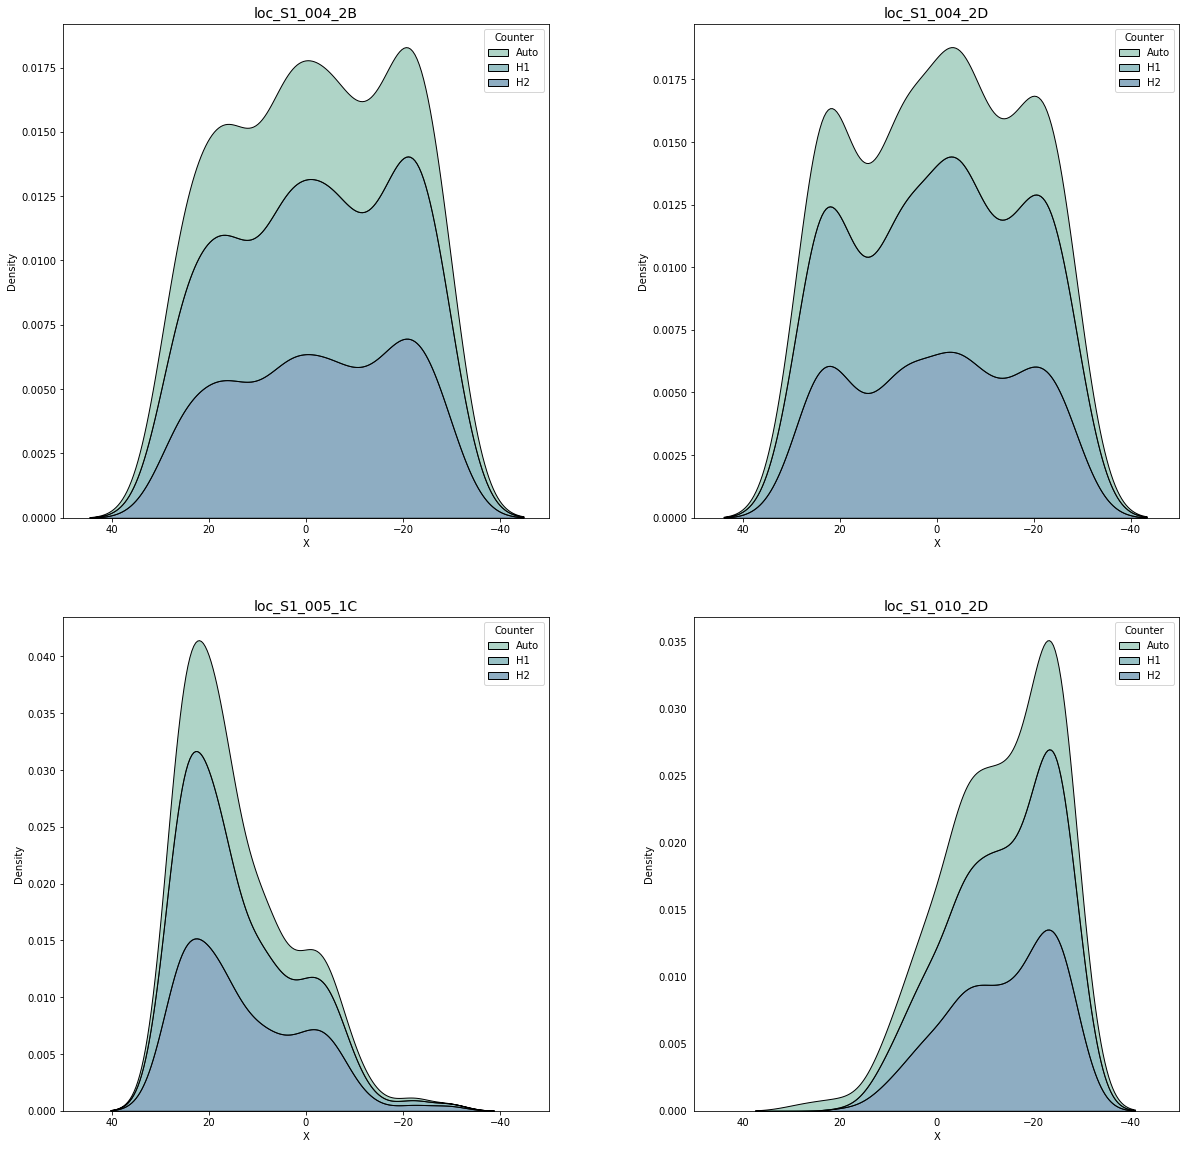

In [17]:
subs_grouped = subs_df.groupby('FileName')

font = {'weight':'normal', 'size':10}


f, ax = plt.subplots(nrows=2, ncols=2,
                        figsize=(20, 20),
                        gridspec_kw={'wspace': 0.30},
                       )
i=0

for n, g in subs_grouped:
    fname = g['FileName'].unique()[0]
    plt.tick_params(left=False, bottom=False)
    plt.rc('axes', titlesize=14)     # fontsize of the axes title
    plt.rc('font', **font)

    #sns.displot(data=g, x="X", hue="Counter", kind="kde", label='FileName', fill=True, ax=ax.flat[i])
    sns.kdeplot(data=g, x="X", hue="Counter", fill=True, ax=ax.flat[i], multiple="stack", alpha=.5, palette="crest").set(title = fname, 
                xlim = (50,-50))
    i += 1

    plt.rcParams['svg.fonttype'] = 'none'

#plt.savefig('C:/Users/Emily/Desktop/UL_analysis/subset_hva.svg')